<a href="https://colab.research.google.com/github/lucash-h/SENG474/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/SENG 474/Assignment1/spambase_augmented.csv'
df = pd.read_csv(file_path)

In [4]:
print(df.head())

   0.000  0.640  0.640.1  0.000.1  0.320  0.000.2  0.000.3  0.000.4  0.000.5  \
0   0.21   0.28     0.50      0.0   0.14     0.28     0.21     0.07     0.00   
1   0.06   0.00     0.71      0.0   1.23     0.19     0.19     0.12     0.64   
2   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
3   0.00   0.00     0.00      0.0   0.63     0.00     0.31     0.63     0.31   
4   0.00   0.00     0.00      0.0   1.85     0.00     0.00     1.85     0.00   

   0.000.6  ...  0.000.816  0.000.817  0.000.818  0.000.819  0.000.820  \
0     0.94  ...       0.00        0.0        0.0       0.00       0.00   
1     0.25  ...       0.06        0.0        0.0       0.12       0.06   
2     0.63  ...       0.00        0.0        0.0       0.00       0.00   
3     0.63  ...       0.00        0.0        0.0       0.00       0.00   
4     0.00  ...       0.00        0.0        0.0       0.00       0.00   

   0.000.821  0.000.822  0.000.823  0.000.824  1  
0       0.00       0.00

In [5]:
#now to split data into vectors
#each has 48 features of the frequency of some word
#this dataset has the original 57 features and a new feature for every pair of the 48 words and for any pair of words, the new feature is the sum of those words frequencies
#that means that there is 2^48 + 58 features? subract like pairs
#column asp is # 1186 so yea
#so vectors will be 1 * 1186 what the fuck



In [6]:
import numpy as np

np.shape(df)

(4600, 1186)

In [7]:
#split into training/test data  ***might be worth adding labels ie last col***
#maybe randomize later
#3640-> train
#960 -> test
x = df.iloc[:,:-1] #features
y = df.iloc[:,-1] #label/last col

x_train = x[:3640]
y_train = y[:3640]
print(np.shape(x_train))
print(np.shape(y_train))

x_test = x[3640:]
y_test = y[3640:]
print(np.shape(x_test))
print(np.shape(y_test))

(3640, 1185)
(3640,)
(960, 1185)
(960,)


In [8]:
print(x_train.iloc[0])
print("SHAPE IS : " + str(np.shape(x_train.iloc[0])))

0.000        0.21
0.640        0.28
0.640.1      0.50
0.000.1      0.00
0.320        0.14
             ... 
0.000.820    0.00
0.000.821    0.00
0.000.822    0.00
0.000.823    0.00
0.000.824    0.00
Name: 0, Length: 1185, dtype: float64
SHAPE IS : (1185,)


In [9]:
print(x_test.iloc[0])
print("SHAPE IS : " + str(np.shape(x_test)))

0.000        0.0
0.640        0.0
0.640.1      0.0
0.000.1      0.0
0.320        0.0
            ... 
0.000.820    0.0
0.000.821    0.0
0.000.822    0.0
0.000.823    0.0
0.000.824    0.0
Name: 3640, Length: 1185, dtype: float64
SHAPE IS : (960, 1185)


In [10]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "gini", random_state=0).fit(x_train,y_train)

In [11]:
import matplotlib.pyplot as plt

In [12]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

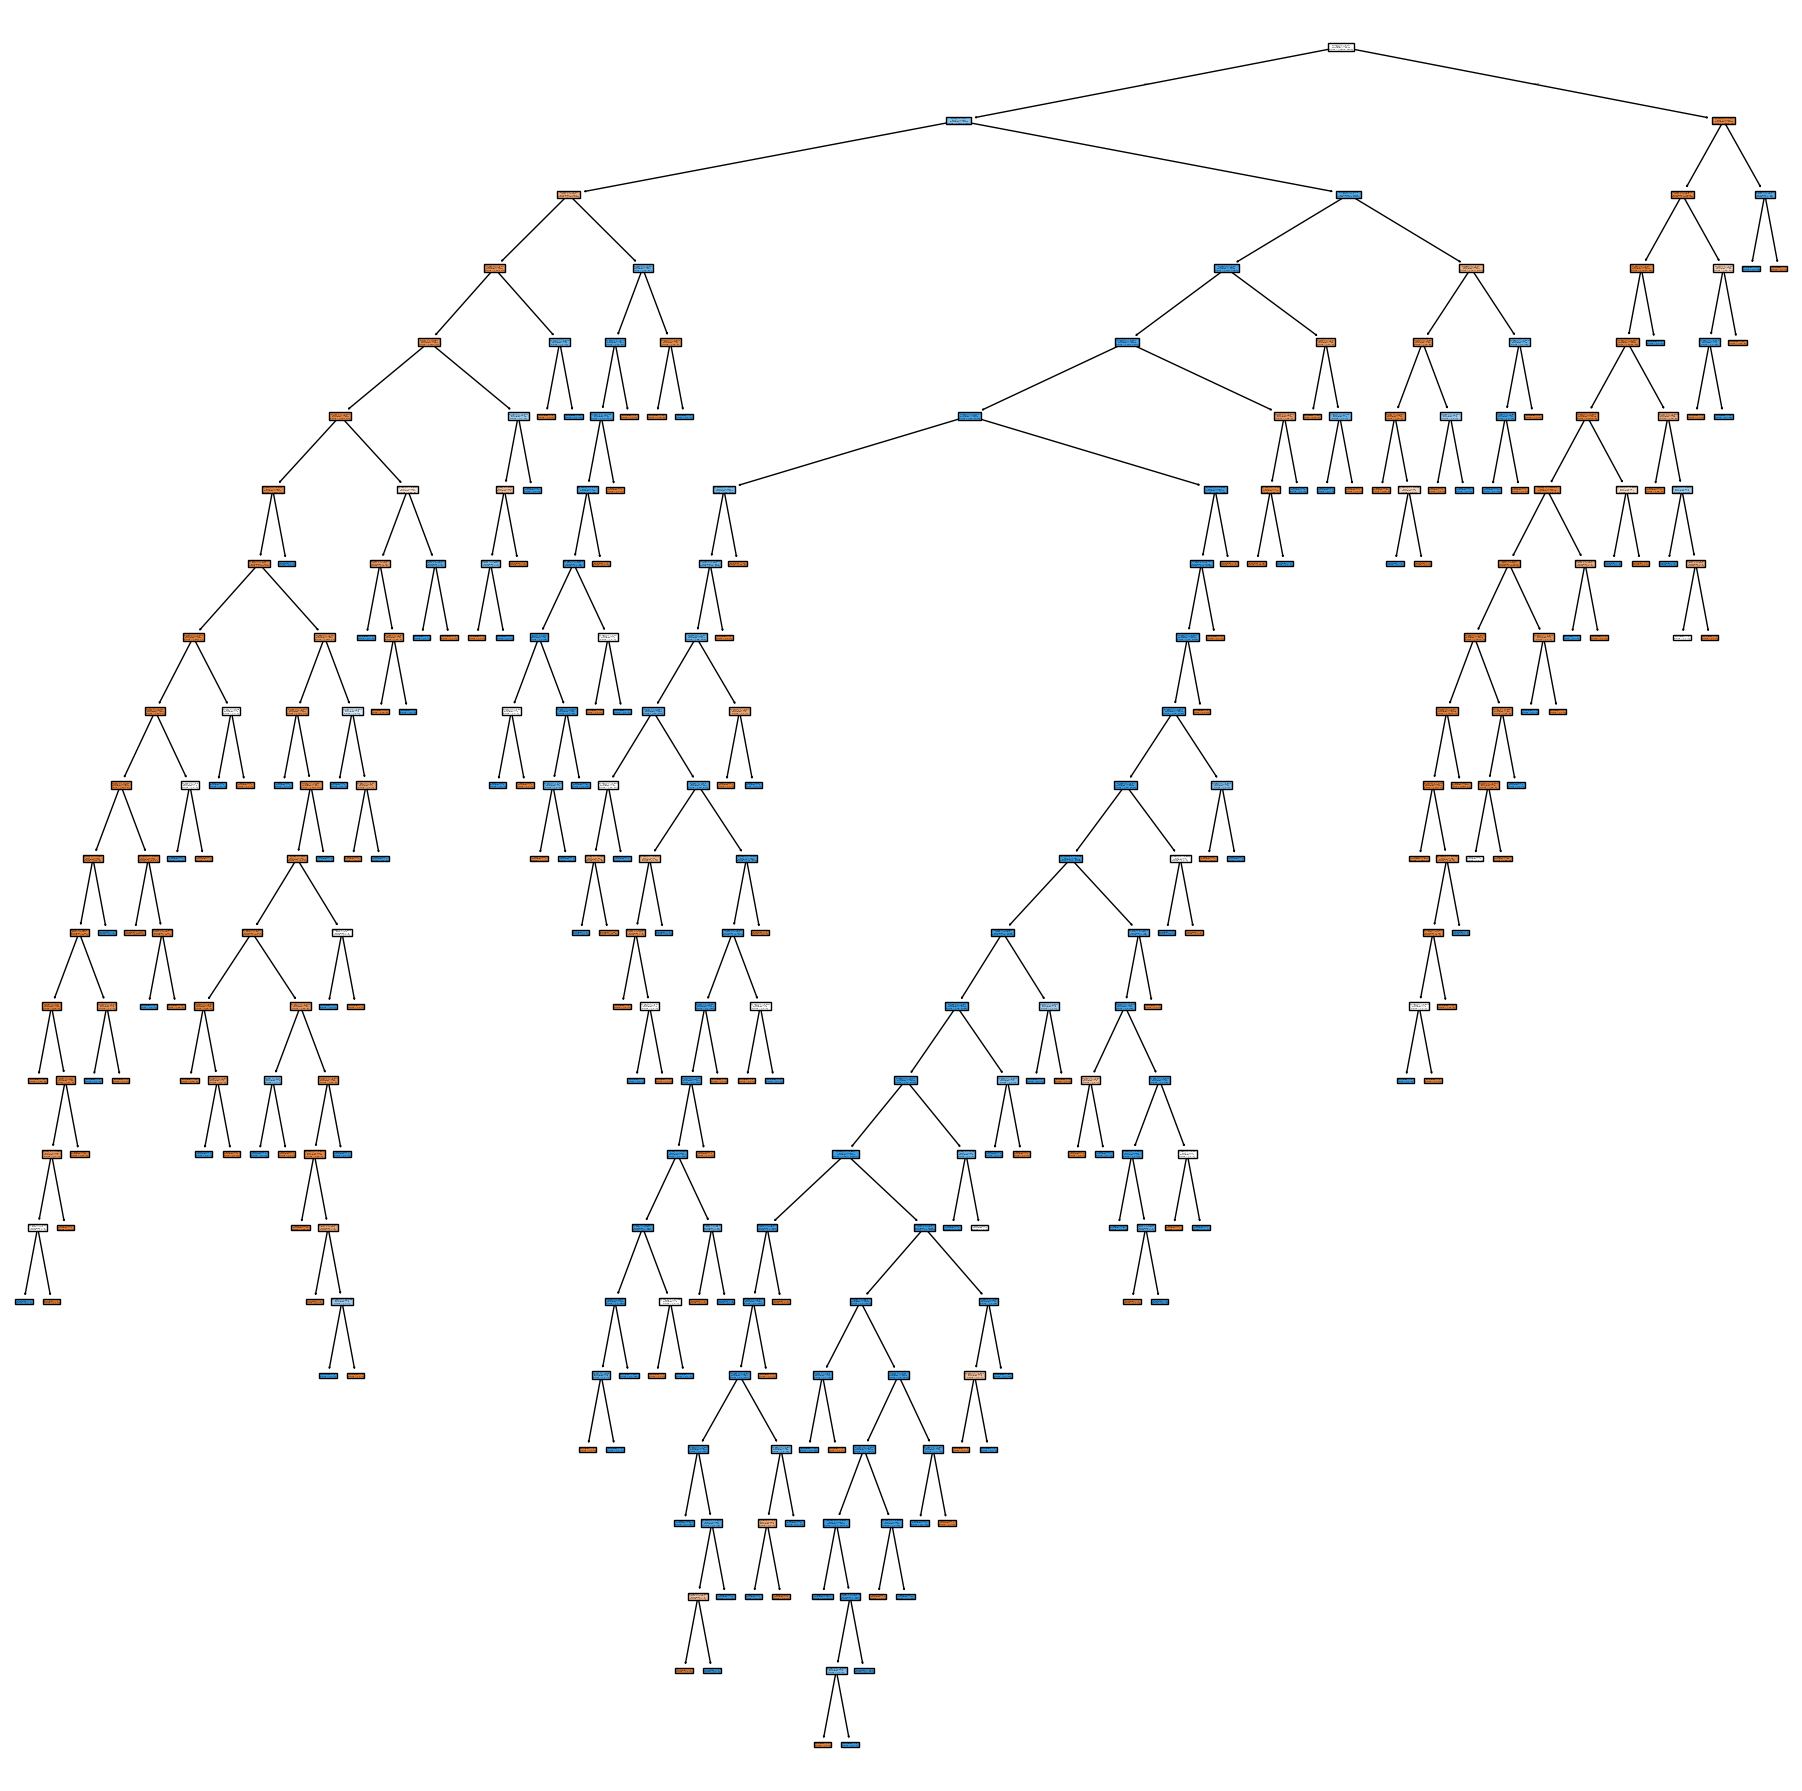

In [13]:
from sklearn.tree import plot_tree
from sklearn import tree


plt.figure(figsize=(23, 23))
plot_tree(dtc, filled=True)
plt.show()
#text_representation = tree.export_text(dtc)
#print(text_representation)


In [14]:
accuracy_before_pruning = dtc.score(x_test, y_test)
print("Accuracy before pruning:", accuracy_before_pruning)

Accuracy before pruning: 0.7572916666666667


In [15]:
dtc.tree_.node_count
#left child -> left_child_index = dtc.tree_.children_left[0]
#right child -> right_child_index = dtc.tree_.children_right[0]

321

In [16]:
print(type(dtc))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [26]:
import copy

Create mega tree <br>
Go through every node from the bottom <br>
at each node, remove it and it's children and compare the accuracy of the full tree with and without it <br>
record the accuracy(maybe regardless, would make life easier)<br>
Go until you reach the root node<br>
then find the tree with the greatest accuracy <br>

algo (node) :
Assuming you already have the accuracy measure for tree<br>
curr = node <br>
curr.left = null<br>
curr.right = null <br>
curr = null <br>

### should probably do it recursively but general idea is there I think -> for reduced error pruning

In [31]:
from sklearn import tree

In [32]:
def eliminate_nodes(model, index):
     # Base case: If the node is a leaf, do nothing
    if model.tree_.children_left[index] == -1 and model.tree_.children_right[index] == -1:
        return

    # Children check
    if model.tree_.children_left[index] != -1:
        eliminate_nodes(model, model.tree_.children_left[index])
    if model.tree_.children_right[index] != -1:
        eliminate_nodes(model, model.tree_.children_right[index])

    # Set both children to -1 to "remove" the subtree
    model.tree_.children_left[index] = -1
    model.tree_.children_right[index] = -1



In [40]:
def reduced_error_pruning1(model, index, data, label, show=False):
    results = []  # List to store (node_index, accuracy) pairs

    # Get baseline accuracy
    original_accuracy = model.score(data, label)
    results.append((-1, original_accuracy))  # -1 indicates original tree

    # Create and evaluate pruned tree
    changed = copy.deepcopy(model)
    eliminate_nodes(changed, index)
    new_accuracy = changed.score(data, label)
    results.append((index, new_accuracy))

    if(show == True):
      print("ORIGINAL MODEL DATA")
      print(f"OG NUMBER OF NODE IS {model.tree_.node_count}")
      print_model(model)

      print("CHANGED MODEL DATA")
      print(f"NEW NUMBER OF NODE IS {changed.tree_.node_count}")
      print_model(changed)
    return results

In [42]:
def print_model(model):
  plt.figure(figsize=(23, 23))
  plot_tree(model, filled=True)
  plt.show()

In [43]:
def reduced_error_pruning(model, index, data, label):

  print("OLD TREE ACCURACY IS " + str(model.score(data,label)))
  print("NUMBER OF NODES ARE: " + str(model.tree_.node_count))


  plt.figure(figsize=(23, 23))
  plot_tree(model, filled=True)
  plt.show()

  changed = copy.deepcopy(model)
  eliminate_nodes(changed,index)


  print("NEW TREE ACCURACY IS " + str(changed.score(data,label)))
  print("NUMBER OF NODES ARE: " + str(changed.tree_.node_count))
  plt.figure(figsize=(23, 23))
  plot_tree(changed, filled=True)
  plt.show()

In [44]:
results = reduced_error_pruning1(dtc, 5, x_test,y_test)

In [45]:
print(results)

[(-1, 0.7572916666666667), (5, 0.8177083333333334)]


ORIGINAL MODEL DATA
OG NUMBER OF NODE IS 321


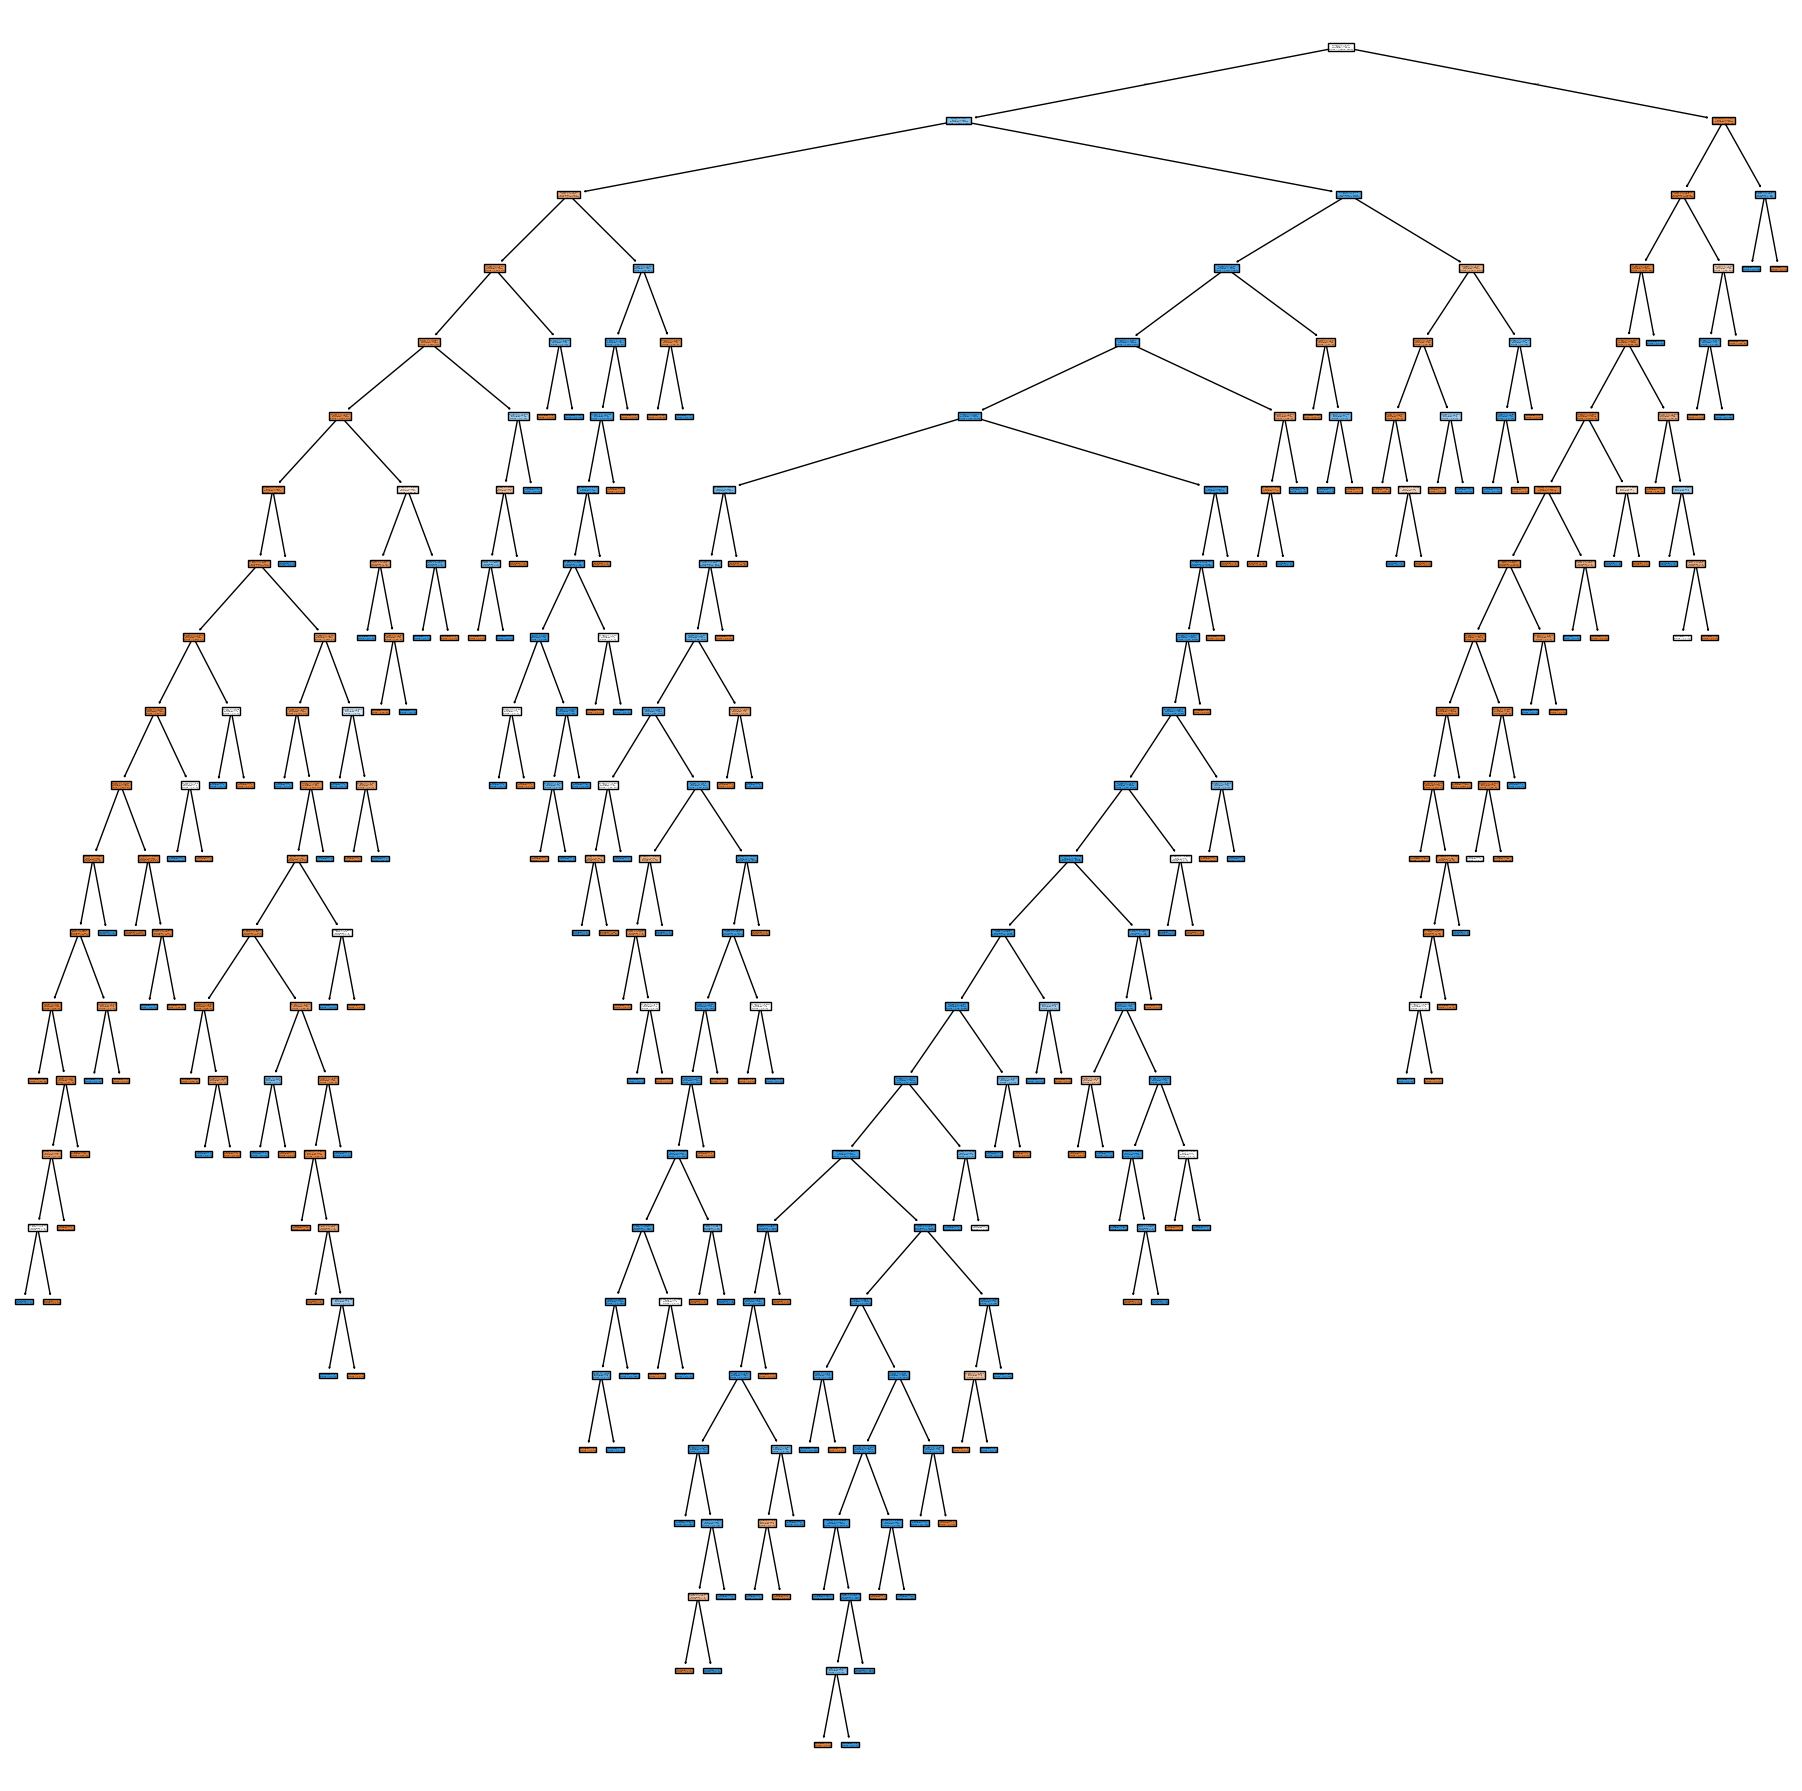

CHANGED MODEL DATA
NEW NUMBER OF NODE IS 321


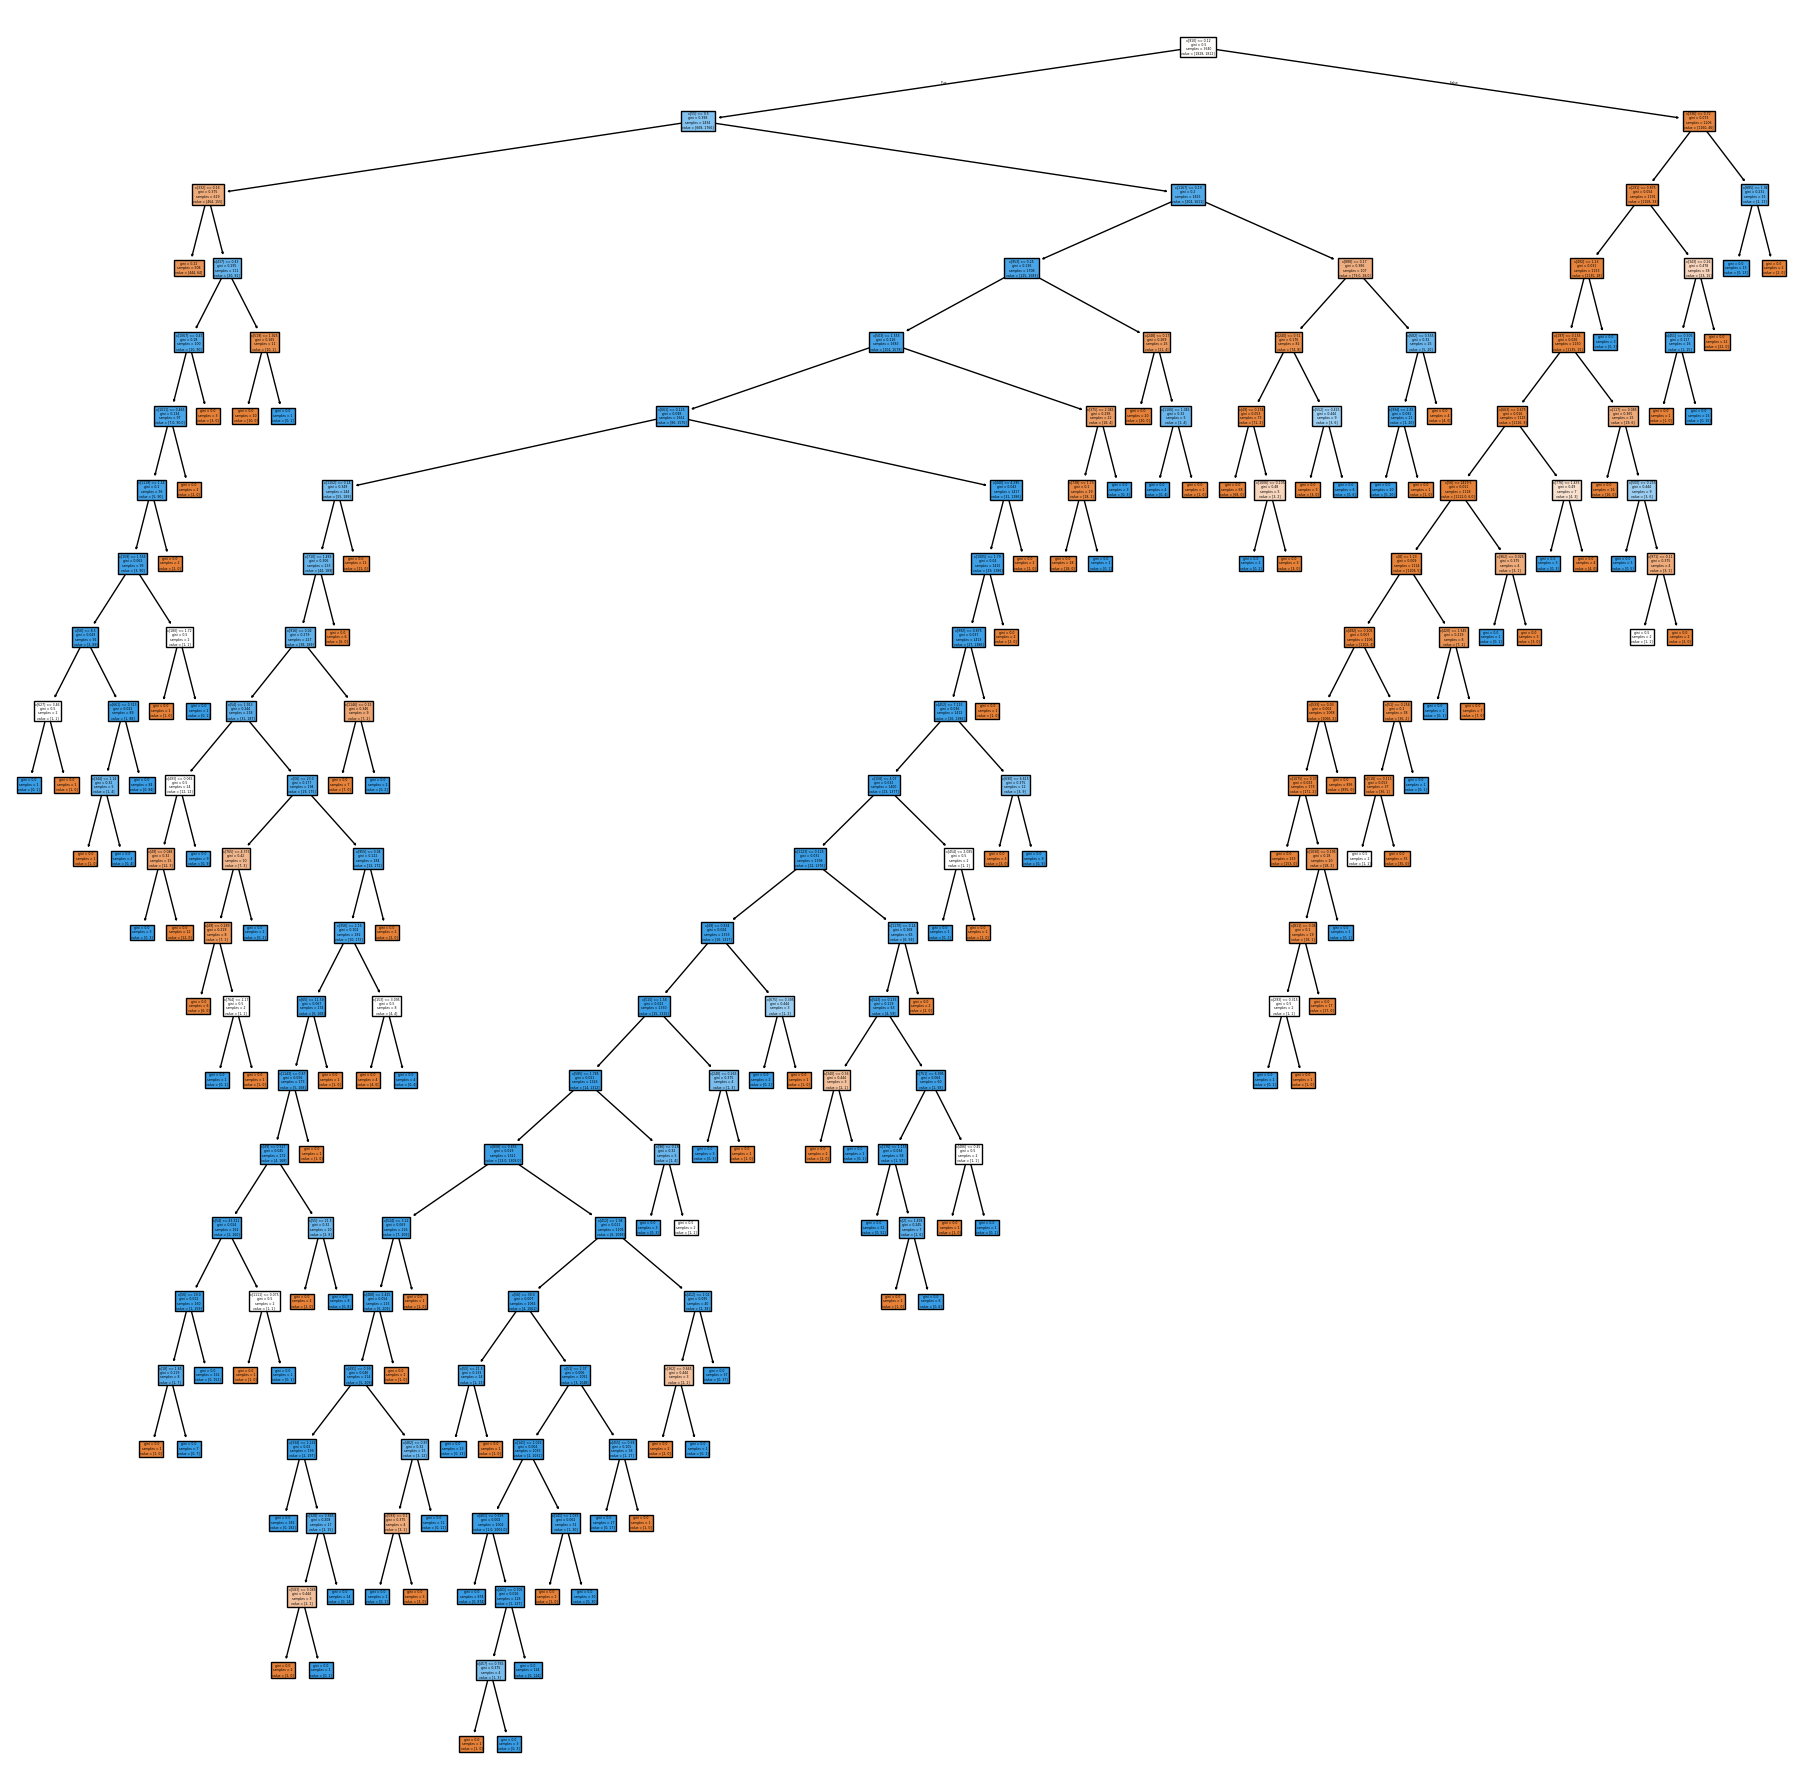

[(-1, 0.7572916666666667), (3, 0.8333333333333334)]


In [46]:
results = reduced_error_pruning1(dtc, 3, x_test,y_test, True)
print(results)